Brief Summary: 

Step 1 Data Preparation: the attributes can be classified into two groups and they are generally in the same form. Thus, I decided to not try too complicated data cleaning methods since it is unnecessary. Secondly, I created a scoring called avg_cost_score to measure the average misclassification cost

Step 2 Modeling with original data: I tried 9 models and used GridSearchCV to find the best parameters.

Step 3 Modeling with preprocessed data: I conducted min-max transformation firstly and then use chi-square test to choose 40 attributes. I tried 10 models and used GridSearchCV to find the best parameters.

Step 4 Model Evaluation: Looking at the results (see appendix), there are two models that both have very good performance according to accuracy rate. Then I looked at precision, recall, f-measure, ROC curve and AUC to choose the best one. If we choose the best model based on average classification cost, only one shows the best performance, but I also look at other metrics to ensure it doesn’t have other potential flaws. 

Details are as follows:

# Basic data preparation

In [14]:
# Import dataset and have a look on dimension of dataset
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
df=pd.read_csv('C:/_Emory/1_676-Machine Learning II/Assignments/HW3/spambase.data',header=None)
df.shape

(4601, 58)

In [3]:
# Take a look at first five rows
pd.options.display.max_columns = None 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Check on whether missing values exist
sum(df.isnull().sum())

0

In [5]:
# Look at basic statisitcs of each attribute
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3

In [6]:
# setup metric: average misclassification cost 
# In this case, I believe classifying a non-spam message as spam will be costlier, since users may miss that email because of the wrong classification
from sklearn.metrics import confusion_matrix
def avg_cost(y_true, y_pred):
    result=confusion_matrix(y_true, y_pred)[0,1]/confusion_matrix(y_true, y_pred).sum()*10+confusion_matrix(y_true, y_pred)[1,0]/confusion_matrix(y_true, y_pred).sum()*1
    return result

from sklearn.metrics import  make_scorer
avg_cost_score = make_scorer(avg_cost, greater_is_better=False)

# Modeling with original data

## Split Train/test dataset

In [7]:
# Get X ,y
y = df.iloc[:,-1]
X = df.iloc[:,:-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)

## Decision Tree 

In [8]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [9]:
# Use GridSearchCV to choose the best parameters based on accuracy
from sklearn.tree import DecisionTreeClassifier 

gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=29),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5]}],
                  scoring='accuracy',
                  cv=5,
                  n_jobs=4)
gs_tree = gs_tree.fit(X_train, y_train)
print(gs_tree.best_params_)
print("Optimal Estimator: ", gs_tree.best_estimator_)
print("Accuracy: ", gs_tree.best_score_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=29,
            splitter='best')
Accuracy:  0.9197101449275362


In [11]:
# Result on test
from sklearn.metrics import accuracy_score
gs_tree_pred = gs_tree.predict(X_test)
round(accuracy_score(y_test, gs_tree_pred),4)

0.9288

In [15]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
gs_tree2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=29),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5]}],
                  scoring=avg_cost_score,
                  cv=5,
                  n_jobs=4)
gs_tree2 = gs_tree2.fit(X_train, y_train)
print(gs_tree2.best_params_)
print("Optimal Estimator: ", gs_tree2.best_estimator_)
print("AvgCost: ", gs_tree2.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=29,
            splitter='best')
AvgCost:  -0.3046376811594203


In [13]:
# Result on test
gs_tree_pred2 = gs_tree2.predict(X_test)
round(avg_cost(y_test, gs_tree_pred2),4)

0.2919

## kNN

In [ ]:
# Since we should firstly transform data before conducting kNN, I did kNN directly in the next part

## Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
gnb_pred=gnb.predict(X_test)
round(accuracy_score(y_test, gnb_pred),4)

0.8167

In [17]:
round(avg_cost(y_test, gnb_pred),4)

1.6612

## lightGBM

In [18]:
# Use GridSearchCV to choose the best parameters based on accuracy
import lightgbm as lgbm
parameters = {'learning_rate':[0.05,0.03,0.1],'n_estimators':[100,120,140,160],'num_leaves':[12,14,16,18,20,31]}
gs_lgbm = GridSearchCV(lgbm.LGBMClassifier(), parameters, scoring='accuracy',cv=5, n_jobs=4)
gs_lgbm = gs_lgbm.fit(X_train, y_train)
print(gs_lgbm.best_params_)
print("Optimal Estimator: ", gs_lgbm.best_estimator_)
print("Accuracy: ", gs_lgbm.best_score_)

{'learning_rate': 0.1, 'n_estimators': 160, 'num_leaves': 14}
Optimal Estimator:  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=160, n_jobs=-1, num_leaves=14, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Accuracy:  0.9556521739130435


In [19]:
gs_lgbm_pred = gs_lgbm.predict(X_test)
round(accuracy_score(y_test, gs_lgbm_pred),4)

0.9592

In [20]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
import lightgbm as lgbm
parameters = {'learning_rate':[0.05,0.03,0.1],'n_estimators':[100,120,140,160],'num_leaves':[12,14,16,18,20,31]}
gs_lgbm2 = GridSearchCV(lgbm.LGBMClassifier(), parameters, scoring=avg_cost_score,cv=5, n_jobs=4)
gs_lgbm2 = gs_lgbm2.fit(X_train, y_train)
print(gs_lgbm2.best_params_)
print("Optimal Estimator: ", gs_lgbm2.best_estimator_)
print("AvgCost: ", gs_lgbm2.best_score_)

{'learning_rate': 0.03, 'n_estimators': 100, 'num_leaves': 18}
Optimal Estimator:  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.03, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=18, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
AvgCost:  -0.2008695652173913


In [21]:
gs_lgbm_pred2 = gs_lgbm2.predict(X_test)
round(avg_cost(y_test, gs_lgbm_pred2),4)

0.2745

## SVM

In [22]:
# Use GridSearchCV to choose the best parameters based on accuracy
from sklearn.svm import LinearSVC
gs_svm = GridSearchCV(estimator=LinearSVC(random_state=29),
                  param_grid=[{'loss':['hinge','squared_hinge'], 
                              'C':[1,0.1,0.01],
                              'tol':[1e-4,1e-5,1e-6]}],
                  scoring='accuracy',
                  cv=5,
                  n_jobs=4)
gs_svm = gs_svm.fit(X_train, y_train)
print(gs_svm.best_params_)
print("Optimal Estimator: ", gs_svm.best_estimator_)
print("Accuracy: ", gs_svm.best_score_)

{'C': 0.1, 'loss': 'hinge', 'tol': 0.0001}
Optimal Estimator:  LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=29, tol=0.0001, verbose=0)
Accuracy:  0.9005797101449275


In [23]:
gs_svm_pred = gs_svm.predict(X_test)
round(accuracy_score(y_test, gs_svm_pred),4)

0.8931

In [25]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
from sklearn.svm import LinearSVC
gs_svm2 = GridSearchCV(estimator=LinearSVC(random_state=29),
                  param_grid=[{'loss':['hinge','squared_hinge'], 
                              'C':[1,0.1,0.01],
                              'tol':[1e-4,1e-5,1e-6]}],
                  scoring=avg_cost_score,
                  cv=5,
                  n_jobs=4)
gs_svm2 = gs_svm2.fit(X_train, y_train)
print(gs_svm2.best_params_)
print("Optimal Estimator: ", gs_svm2.best_estimator_)
print("AvgCost: ", gs_svm2.best_score_)

{'C': 0.01, 'loss': 'hinge', 'tol': 0.0001}
Optimal Estimator:  LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=29, tol=0.0001, verbose=0)
AvgCost:  -0.4101449275362319


In [26]:
gs_svm_pred2 = gs_svm2.predict(X_test)
round(avg_cost(y_test, gs_svm_pred2),4)

0.3997

## Random Forest

In [27]:
# Use GridSearchCV to choose the best parameters based on accuracy
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[10,20,30],'max_depth':[2,3,4,5],"criterion":["gini", "entropy"],"min_samples_split":[2,4,8]}
gs_forest = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy',n_jobs=4)
gs_forest= gs_forest.fit(X_train, y_train)
print(gs_forest.best_params_)
print("Optimal Estimator: ", gs_forest.best_estimator_)
print("Accuracy: ", gs_forest.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 20}
Optimal Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy:  0.9249275362318841


In [28]:
gs_forest_pred = gs_forest.predict(X_test)
round(accuracy_score(y_test, gs_forest_pred),4)

0.9149

In [29]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[10,20,30],'max_depth':[2,3,4,5],"criterion":["gini", "entropy"],"min_samples_split":[2,4,8]}
gs_forest2 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring=avg_cost_score,n_jobs=4)
gs_forest2 = gs_forest2.fit(X_train, y_train)
print(gs_forest2.best_params_)
print("Optimal Estimator: ", gs_forest2.best_estimator_)
print("AvgCost: ", gs_forest2.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 30}
Optimal Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
AvgCost:  -0.18927536231884057


In [30]:
gs_forest_pred2 = gs_forest2.predict(X_test)
round(avg_cost(y_test, gs_forest_pred2),4)

0.2884

## Logistic Regression

In [31]:
# Use GridSearchCV to choose the best parameters based on accuracy
from sklearn.linear_model import LogisticRegression 
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=29),
                  param_grid=[{'C': [  0.001, 0.01, 0.1 ,1 ,10 ,100, 1000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=5, n_jobs=4)
gs_lr = gs_lr.fit(X_train,y_train)
print(gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
print("Accuracy: ", gs_lr.best_score_)

{'C': 1, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=29, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy:  0.9266666666666666


In [32]:
gs_lr_pred = gs_lr.predict(X_test)
round(accuracy_score(y_test, gs_lr_pred),4)

0.9279

In [33]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
from sklearn.linear_model import LogisticRegression 
gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=29),
                  param_grid=[{'C': [  0.001, 0.01, 0.1 ,1 ,10 ,100, 1000],
                             'penalty':['l1','l2']}],
                  scoring=avg_cost_score,
                  cv=5, n_jobs=4)
gs_lr2 = gs_lr2.fit(X_train,y_train)
print(gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
print("AvgCost: ", gs_lr2.best_score_)

{'C': 1, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=29, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AvgCost:  -0.33942028985507244


In [34]:
gs_lr_pred2 = gs_lr2.predict(X_test)
round(avg_cost(y_test, gs_lr_pred2),4)

0.2989

## Neural Network

In [35]:
# Take a look at potential NN model firstly
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes = (100,100,100,100), learning_rate = 'adaptive', random_state = 29)
nn = nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
round(accuracy_score(y_test, nn_pred),4)

0.9348

In [36]:
# Use GridSearchCV to choose the best parameters based on accuracy
parameters = {'learning_rate_init': [0.001,0.002],
              'alpha': [0,0.0001,0.0002],
              'solver': ['lbfgs', 'adam']}
gs_nn = GridSearchCV(MLPClassifier(hidden_layer_sizes = (100,100,100,100),learning_rate = 'constant',random_state = 29), parameters, cv=5, n_jobs=4)
gs_nn = gs_nn.fit(X_train, y_train)
print(gs_nn.best_params_)
print("Optimal Estimator: ", gs_nn.best_estimator_)
print("Accuracy: ", gs_nn.best_score_)

{'alpha': 0.0002, 'learning_rate_init': 0.002, 'solver': 'adam'}
Optimal Estimator:  MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=29, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Accuracy:  0.927536231884058


In [37]:
gs_nn_pred = gs_nn.predict(X_test) 
round(accuracy_score(y_test, gs_nn_pred),4)

0.9392

In [38]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
parameters = {'learning_rate_init': [0.001,0.002],
              'alpha': [0,0.0001,0.0002],
              'solver': ['lbfgs', 'adam']}
gs_nn2 = GridSearchCV(MLPClassifier(hidden_layer_sizes = (100,100,100,100),learning_rate = 'constant',random_state = 29), parameters,
                     scoring=avg_cost_score,cv=5, n_jobs=4)
gs_nn2 = gs_nn2.fit(X_train, y_train)
print(gs_nn2.best_params_)
print("Optimal Estimator: ", gs_nn2.best_estimator_)
print("AvgCost: ", gs_nn2.best_score_)

{'alpha': 0.0002, 'learning_rate_init': 0.002, 'solver': 'adam'}
Optimal Estimator:  MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=29, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
AvgCost:  -0.35681159420289854


In [39]:
gs_nn_pred2 = gs_nn2.predict(X_test) 
round(avg_cost(y_test, gs_nn_pred2),4)

0.3501

## Stacking

In [40]:
# Base on three models that perform relatively better: Neural Network, lightGBM, random forest, with the best parameters - based on accuracy
models = [gs_nn.best_estimator_,gs_lgbm.best_estimator_,gs_forest.best_estimator_]

In [41]:
from vecstack import stacking
S_train, S_test = stacking(models,X_train, y_train, X_test,regression=False,mode='oof_pred_bag',needs_proba=False,save_dir=None, 
                           metric=accuracy_score,n_folds=4,stratified=True,shuffle=True, random_state=29,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [MLPClassifier]
    fold  0:  [0.93279258]
    fold  1:  [0.90961761]
    fold  2:  [0.92227378]
    fold  3:  [0.91995360]
    ----
    MEAN:     [0.92115939] + [0.00823468]
    FULL:     [0.92115942]

model  1:     [LGBMClassifier]
    fold  0:  [0.95365006]
    fold  1:  [0.94785632]
    fold  2:  [0.93619490]
    fold  3:  [0.95707657]
    ----
    MEAN:     [0.94869446] + [0.00793346]
    FULL:     [0.94869565]

model  2:     [RandomForestClassifier]
    fold  0:  [0.92004635]
    fold  1:  [0.92352260]
    fold  2:  [0.90255220]
    fold  3:  [0.93735499]
    ----
    MEAN:     [0.92086903] + [0.01239971]
    FULL:     [0.92086957]



In [42]:
stacking_model = LogisticRegression(C=1,penalty="l1")
stacking_model = stacking_model.fit(S_train, y_train)
y_pred_s = stacking_model.predict(S_test)
round(accuracy_score(y_test, y_pred_s),4)

0.9574

In [43]:
# Base on three models that perform relatively better: decision tree, lightGBM, random forest, with the best parameters - based on avg classification cost
models2 = [gs_tree2.best_estimator_,gs_lgbm2.best_estimator_,gs_forest2.best_estimator_]

In [44]:
from vecstack import stacking
S_train, S_test = stacking(models2,X_train, y_train, X_test,regression=False,mode='oof_pred_bag',needs_proba=False,save_dir=None, 
                           metric=accuracy_score,n_folds=4,stratified=True,shuffle=True, random_state=29,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.90730012]
    fold  1:  [0.90961761]
    fold  2:  [0.90951276]
    fold  3:  [0.92691415]
    ----
    MEAN:     [0.91333616] + [0.00789370]
    FULL:     [0.91333333]

model  1:     [LGBMClassifier]
    fold  0:  [0.95017381]
    fold  1:  [0.93395133]
    fold  2:  [0.92227378]
    fold  3:  [0.95939675]
    ----
    MEAN:     [0.94144892] + [0.01433656]
    FULL:     [0.94144928]

model  2:     [RandomForestClassifier]
    fold  0:  [0.90266512]
    fold  1:  [0.90730012]
    fold  2:  [0.89443155]
    fold  3:  [0.91647332]
    ----
    MEAN:     [0.90521753] + [0.00796684]
    FULL:     [0.90521739]



In [46]:
stacking_model = LogisticRegression(C=1,penalty="l1")
stacking_model = stacking_model.fit(S_train, y_train)
y_pred_s2 = stacking_model.predict(S_test)
round(avg_cost(y_test, y_pred_s2),4)

0.2407

# Models with preprocessed data

## Data Pre-processing

In [47]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X)
Xnormal = sc.transform(X)

In [48]:
# Use Chi-square test to choose attributes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new=SelectKBest(chi2, k=40).fit_transform(Xnormal, y)

In [49]:
# Split Train/Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=29)

## Decision Tree 

In [50]:
# Use GridSearchCV to choose the best parameters based on accuracy
from sklearn.tree import DecisionTreeClassifier 

gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=29),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5]}],
                  scoring='accuracy',
                  cv=5,
                  n_jobs=4)
gs_tree = gs_tree.fit(X_train, y_train)
print(gs_tree.best_params_)
print("Optimal Estimator: ", gs_tree.best_estimator_)
print("Accuracy: ", gs_tree.best_score_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=29,
            splitter='best')
Accuracy:  0.923768115942029


In [51]:
# Result on test
gs_tree_pred = gs_tree.predict(X_test)
round(accuracy_score(y_test, gs_tree_pred),4)

0.9279

In [52]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
gs_tree2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=29),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5]}],
                  scoring=avg_cost_score,
                  cv=5,
                  n_jobs=4)
gs_tree2 = gs_tree2.fit(X_train, y_train)
print(gs_tree2.best_params_)
print("Optimal Estimator: ", gs_tree2.best_estimator_)
print("AvgCost: ", gs_tree2.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=29,
            splitter='best')
AvgCost:  -0.2678260869565217


In [53]:
# Result on test
gs_tree_pred2 = gs_tree2.predict(X_test)
round(avg_cost(y_test, gs_tree_pred2),4)

0.2615

## kNN

In [78]:
# Use GridSearchCV to choose the best parameters based on accuracy
from sklearn import neighbors
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=5,
                  n_jobs=4)

gs_knn = gs_knn.fit(X_train, y_train)
print(gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
print("Accuracy: ", gs_knn.best_score_)

{'n_neighbors': 7, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')
Accuracy:  0.898840579710145


In [79]:
# Result on test
gs_knn_pred = gs_knn.predict(X_test)
round(accuracy_score(y_test, gs_knn_pred),4)

0.9062

In [80]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
from sklearn import neighbors
gs_knn2 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9],
                               'weights':['uniform','distance']}],
                  scoring=avg_cost_score,
                  cv=5,
                  n_jobs=4)

gs_knn2 = gs_knn.fit(X_train, y_train)
print(gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_)
print("AvgCost: ", gs_knn2.best_score_)

{'n_neighbors': 7, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')
AvgCost:  0.898840579710145


In [81]:
# Result on test
gs_knn_pred2 = gs_knn2.predict(X_test)
round(avg_cost(y_test, gs_knn_pred2),4)

0.4144

## Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
gnb_pred=gnb.predict(X_test)
round(accuracy_score(y_test, gnb_pred),4)

0.788

In [56]:
round(avg_cost(y_test, gnb_pred),4)

2.0182

## lightGBM

In [57]:
# Use GridSearchCV to choose the best parameters based on accuracy
import lightgbm as lgbm
parameters = {'learning_rate':[0.05,0.03,0.1],'n_estimators':[100,120,140,160],'num_leaves':[12,14,16,18,20,31]}
gs_lgbm = GridSearchCV(lgbm.LGBMClassifier(), parameters, scoring='accuracy',cv=5, n_jobs=4)
gs_lgbm = gs_lgbm.fit(X_train, y_train)
print(gs_lgbm.best_params_)
print("Optimal Estimator: ", gs_lgbm.best_estimator_)
print("Accuracy: ", gs_lgbm.best_score_)

{'learning_rate': 0.05, 'n_estimators': 140, 'num_leaves': 31}
Optimal Estimator:  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=140, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Accuracy:  0.951304347826087


In [58]:
gs_lgbm_pred = gs_lgbm.predict(X_test)
round(accuracy_score(y_test, gs_lgbm_pred),4)

0.9522

In [59]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
import lightgbm as lgbm
parameters = {'learning_rate':[0.05,0.03,0.1],'n_estimators':[100,120,140,160],'num_leaves':[12,14,16,18,20,31]}
gs_lgbm2 = GridSearchCV(lgbm.LGBMClassifier(), parameters, scoring=avg_cost_score,cv=5, n_jobs=4)
gs_lgbm2 = gs_lgbm2.fit(X_train, y_train)
print(gs_lgbm2.best_params_)
print("Optimal Estimator: ", gs_lgbm2.best_estimator_)
print("AvgCost: ", gs_lgbm2.best_score_)

{'learning_rate': 0.03, 'n_estimators': 120, 'num_leaves': 31}
Optimal Estimator:  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.03, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=120, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
AvgCost:  -0.2281159420289855


In [60]:
gs_lgbm_pred2 = gs_lgbm2.predict(X_test)
round(avg_cost(y_test, gs_lgbm_pred2),4)

0.252

## SVM

In [61]:
# Use GridSearchCV to choose the best parameters based on accuracy
from sklearn.svm import LinearSVC
gs_svm = GridSearchCV(estimator=LinearSVC(random_state=29),
                  param_grid=[{'loss':['hinge','squared_hinge'], 
                              'C':[1,0.1,0.01],
                              'tol':[1e-4,1e-5,1e-6]}],
                  scoring='accuracy',
                  cv=5,
                  n_jobs=4)
gs_svm = gs_svm.fit(X_train, y_train)
print(gs_svm.best_params_)
print("Optimal Estimator: ", gs_svm.best_estimator_)
print("Accuracy: ", gs_svm.best_score_)

{'C': 1, 'loss': 'squared_hinge', 'tol': 0.0001}
Optimal Estimator:  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=29, tol=0.0001,
     verbose=0)
Accuracy:  0.907536231884058


In [62]:
gs_svm_pred = gs_svm.predict(X_test)
round(accuracy_score(y_test, gs_svm_pred),4)

0.8949

In [63]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
from sklearn.svm import LinearSVC
gs_svm2 = GridSearchCV(estimator=LinearSVC(random_state=29),
                  param_grid=[{'loss':['hinge','squared_hinge'], 
                              'C':[1,0.1,0.01],
                              'tol':[1e-4,1e-5,1e-6]}],
                  scoring=avg_cost_score,
                  cv=5,
                  n_jobs=4)
gs_svm2 = gs_svm2.fit(X_train, y_train)
print(gs_svm2.best_params_)
print("Optimal Estimator: ", gs_svm2.best_estimator_)
print("AvgCost: ", gs_svm2.best_score_)

{'C': 1, 'loss': 'squared_hinge', 'tol': 0.0001}
Optimal Estimator:  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=29, tol=0.0001,
     verbose=0)
AvgCost:  -0.3507246376811594


In [64]:
gs_svm_pred2 = gs_svm2.predict(X_test)
round(avg_cost(y_test, gs_svm_pred2),4)

0.4023

## Random Forest

In [65]:
# Use GridSearchCV to choose the best parameters based on accuracy
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[10,20,30],'max_depth':[2,3,4,5],"criterion":["gini", "entropy"],"min_samples_split":[2,4,8]}
gs_forest = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy',n_jobs=4)
gs_forest= gs_forest.fit(X_train, y_train)
print(gs_forest.best_params_)
print("Optimal Estimator: ", gs_forest.best_estimator_)
print("Accuracy: ", gs_forest.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 30}
Optimal Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy:  0.9243478260869565


In [66]:
gs_forest_pred = gs_forest.predict(X_test)
round(accuracy_score(y_test, gs_forest_pred),4)

0.9149

In [67]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[10,20,30],'max_depth':[2,3,4,5],"criterion":["gini", "entropy"],"min_samples_split":[2,4,8]}
gs_forest2 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring=avg_cost_score,n_jobs=4)
gs_forest2 = gs_forest2.fit(X_train, y_train)
print(gs_forest2.best_params_)
print("Optimal Estimator: ", gs_forest2.best_estimator_)
print("AvgCost: ", gs_forest2.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 30}
Optimal Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
AvgCost:  -0.1991304347826087


In [68]:
gs_forest_pred2 = gs_forest2.predict(X_test)
round(avg_cost(y_test, gs_forest_pred2),4)

0.2693

## Logistic Regression

In [69]:
# Use GridSearchCV to choose the best parameters based on accuracy
from sklearn.linear_model import LogisticRegression 
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=29),
                  param_grid=[{'C': [  0.001, 0.01, 0.1 ,1 ,10 ,100, 1000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=5, n_jobs=4)
gs_lr = gs_lr.fit(X_train,y_train)
print(gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
print("Accuracy: ", gs_lr.best_score_)

{'C': 1000, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=29, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy:  0.9257971014492754


In [70]:
gs_lr_pred = gs_lr.predict(X_test)
round(accuracy_score(y_test, gs_lr_pred),4)

0.9157

In [71]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
from sklearn.linear_model import LogisticRegression 
gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=29),
                  param_grid=[{'C': [  0.001, 0.01, 0.1 ,1 ,10 ,100, 1000],
                             'penalty':['l1','l2']}],
                  scoring=avg_cost_score,
                  cv=5, n_jobs=4)
gs_lr2 = gs_lr2.fit(X_train,y_train)
print(gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
print("AvgCost: ", gs_lr2.best_score_)

{'C': 1000, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=29, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AvgCost:  -0.3220289855072464


In [72]:
gs_lr_pred2 = gs_lr2.predict(X_test)
round(avg_cost(y_test, gs_lr_pred2),4)

0.3736

## Neural Network

In [73]:
# Take a look at potential NN model firstly
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes = (100,100,100,100), learning_rate = 'adaptive', random_state = 29)
nn = nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
round(accuracy_score(y_test, nn_pred),4)

0.9392

In [74]:
# Use GridSearchCV to choose the best parameters based on accuracy
parameters = {'learning_rate_init': [0.001,0.002],
              'alpha': [0,0.0001,0.0002],
              'solver': ['lbfgs', 'adam']}
gs_nn = GridSearchCV(MLPClassifier(hidden_layer_sizes = (100,100,100,100),learning_rate = 'constant',random_state = 29), parameters, cv=5, n_jobs=4)
gs_nn = gs_nn.fit(X_train, y_train)
print(gs_nn.best_params_)
print("Optimal Estimator: ", gs_nn.best_estimator_)
print("Accuracy: ", gs_nn.best_score_)

{'alpha': 0.0001, 'learning_rate_init': 0.002, 'solver': 'adam'}
Optimal Estimator:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=29, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Accuracy:  0.9359420289855073


In [75]:
gs_nn_pred = gs_nn.predict(X_test) 
round(accuracy_score(y_test, gs_nn_pred),4)

0.9453

In [76]:
# Use GridSearchCV to choose the best parameters based on average misclassification cost
parameters = {'learning_rate_init': [0.001,0.002],
              'alpha': [0,0.0001,0.0002],
              'solver': ['lbfgs', 'adam']}
gs_nn2 = GridSearchCV(MLPClassifier(hidden_layer_sizes = (100,100,100,100),learning_rate = 'constant',random_state = 29), parameters,
                     scoring=avg_cost_score,cv=5, n_jobs=4)
gs_nn2 = gs_nn2.fit(X_train, y_train)
print(gs_nn2.best_params_)
print("Optimal Estimator: ", gs_nn2.best_estimator_)
print("AvgCost: ", gs_nn2.best_score_)

{'alpha': 0.0001, 'learning_rate_init': 0.002, 'solver': 'adam'}
Optimal Estimator:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=29, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
AvgCost:  -0.3327536231884058


In [77]:
gs_nn_pred2 = gs_nn2.predict(X_test) 
round(avg_cost(y_test, gs_nn_pred2),4)

0.2737

## Stacking

In [82]:
# Base on three models that perform relatively better: Neural Network, lightGBM, decision tree, with the best parameters - based on accuracy
models = [gs_nn.best_estimator_,gs_lgbm.best_estimator_,gs_tree.best_estimator_]

In [83]:
from vecstack import stacking
S_train, S_test = stacking(models,X_train, y_train, X_test,regression=False,mode='oof_pred_bag',needs_proba=False,save_dir=None, 
                           metric=accuracy_score,n_folds=4,stratified=True,shuffle=True, random_state=29,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [MLPClassifier]
    fold  0:  [0.93511008]
    fold  1:  [0.91772885]
    fold  2:  [0.93039443]
    fold  3:  [0.94663573]
    ----
    MEAN:     [0.93246727] + [0.01035914]
    FULL:     [0.93246377]

model  1:     [LGBMClassifier]
    fold  0:  [0.95480881]
    fold  1:  [0.93858633]
    fold  2:  [0.94779582]
    fold  3:  [0.95823666]
    ----
    MEAN:     [0.94985690] + [0.00751691]
    FULL:     [0.94985507]

model  2:     [DecisionTreeClassifier]
    fold  0:  [0.92004635]
    fold  1:  [0.91077636]
    fold  2:  [0.90951276]
    fold  3:  [0.93155452]
    ----
    MEAN:     [0.91797250] + [0.00883351]
    FULL:     [0.91797101]



In [84]:
stacking_model = LogisticRegression(C=1,penalty="l1")
stacking_model = stacking_model.fit(S_train, y_train)
y_pred_s = stacking_model.predict(S_test)
round(accuracy_score(y_test, y_pred_s),4)

0.9513

In [85]:
# Base on three models that perform relatively better: decision tree, lightGBM, random forest, with the best parameters - based on avg classification cost
models2 = [gs_tree2.best_estimator_,gs_lgbm2.best_estimator_,gs_forest2.best_estimator_]

In [86]:
from vecstack import stacking
S_train, S_test = stacking(models2,X_train, y_train, X_test,regression=False,mode='oof_pred_bag',needs_proba=False,save_dir=None, 
                           metric=accuracy_score,n_folds=4,stratified=True,shuffle=True, random_state=29,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.91657010]
    fold  1:  [0.89918888]
    fold  2:  [0.90719258]
    fold  3:  [0.92575406]
    ----
    MEAN:     [0.91217640] + [0.00996458]
    FULL:     [0.91217391]

model  1:     [LGBMClassifier]
    fold  0:  [0.95365006]
    fold  1:  [0.93395133]
    fold  2:  [0.94083527]
    fold  3:  [0.95823666]
    ----
    MEAN:     [0.94666833] + [0.00972519]
    FULL:     [0.94666667]

model  2:     [RandomForestClassifier]
    fold  0:  [0.92815759]
    fold  1:  [0.91541136]
    fold  2:  [0.90603248]
    fold  3:  [0.93735499]
    ----
    MEAN:     [0.92173910] + [0.01195608]
    FULL:     [0.92173913]



In [87]:
stacking_model = LogisticRegression(C=1,penalty="l1")
stacking_model = stacking_model.fit(S_train, y_train)
y_pred_s2 = stacking_model.predict(S_test)
round(avg_cost(y_test, y_pred_s2),4)

0.2328

# Final Models & Evaluation

## Best model based on overall predictive accuracy

 After trying different models and selecting the best parameters based on transformed and untranformed data,
 I found out that lightGBM (accuracy=0.9592) and stacking (0.9574) has very close results (both on untransformed data).
 Thus I decided to look at their precision, recall, f-measure, ROC curve to choose the best model.

### lightGBM Performance 

In [88]:
# Get the best two models
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.25, random_state=29)

# lightGBM
lgbm_f=lgbm.LGBMClassifier(learning_rate=0.1, n_estimators=160, num_leaves=14)
lgbm_f= lgbm_f.fit(X_train_f, y_train_f)
lgbm_pred_f = lgbm_f.predict(X_test_f)

In [92]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
print(classification_report(y_test_f, lgbm_pred_f))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       680
           1       0.95      0.95      0.95       471

   micro avg       0.96      0.96      0.96      1151
   macro avg       0.96      0.96      0.96      1151
weighted avg       0.96      0.96      0.96      1151



### stacking Performance 

In [102]:
models_f = [MLPClassifier(hidden_layer_sizes = (100,100,100,100),learning_rate = 'constant',random_state = 29,alpha=0.0002, learning_rate_init=0.002, solver='adam'),
            lgbm.LGBMClassifier(learning_rate=0.1, n_estimators=160, num_leaves=14),
            RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=8, n_estimators=30)]

In [103]:
from vecstack import stacking
S_train_f, S_test_f = stacking(models_f,X_train_f, y_train_f, X_test_f,
                               regression=False,mode='oof_pred_bag',needs_proba=False,save_dir=None, 
                           metric=accuracy_score,n_folds=4,stratified=True,shuffle=True, random_state=29,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [MLPClassifier]
    fold  0:  [0.93279258]
    fold  1:  [0.90961761]
    fold  2:  [0.92227378]
    fold  3:  [0.91995360]
    ----
    MEAN:     [0.92115939] + [0.00823468]
    FULL:     [0.92115942]

model  1:     [LGBMClassifier]
    fold  0:  [0.95365006]
    fold  1:  [0.94785632]
    fold  2:  [0.93619490]
    fold  3:  [0.95707657]
    ----
    MEAN:     [0.94869446] + [0.00793346]
    FULL:     [0.94869565]

model  2:     [RandomForestClassifier]
    fold  0:  [0.92699884]
    fold  1:  [0.92004635]
    fold  2:  [0.91299304]
    fold  3:  [0.94199536]
    ----
    MEAN:     [0.92550840] + [0.01072974]
    FULL:     [0.92550725]



In [104]:
stacking_model_f = LogisticRegression(C=1,penalty="l1")
stacking_model_f = stacking_model_f.fit(S_train_f, y_train_f)
y_pred_s_f = stacking_model_f.predict(S_test_f)

In [105]:
print(classification_report(y_test_f, y_pred_s_f))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       680
           1       0.94      0.94      0.94       471

   micro avg       0.95      0.95      0.95      1151
   macro avg       0.95      0.95      0.95      1151
weighted avg       0.95      0.95      0.95      1151



### ROC & AUC Comparison

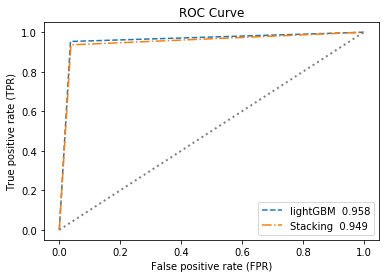

In [122]:
# ROC curve
import matplotlib.pyplot as plt  
from sklearn import  metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test_f, lgbm_pred_f)
plt.plot(fpr, tpr,label='lightGBM  '+ str(round(auc(x=fpr, y=tpr),3)),linestyle='--')
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_f, y_pred_s_f)
plt.plot(fpr2, tpr2,label='Stacking  '+ str(round(auc(x=fpr2, y=tpr2),3)),linestyle='-.')
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle=':',
         color='gray',
         linewidth=2)
plt.legend(loc='lower right')  
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title("ROC Curve")
plt.show() 

### Summary on best model based on accuracy rate

Looking at the precision, recall and f-measure, lightGBM always performs better than stacking. It is also true when we look at ROC curve . Thus, I decided to choose lightGBM as the best model based on accuracy score (performance on test set is 0.9592).

## Best model based on average misclassification cost

Among all models I tried, the best model on average misclassification cost is using stacking method transformed data, with the average misclassification cost of 0.2328.

In [125]:
# See precision, recall and f-measure
print(classification_report(y_test, y_pred_s2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       680
           1       0.95      0.94      0.94       471

   micro avg       0.95      0.95      0.95      1151
   macro avg       0.95      0.95      0.95      1151
weighted avg       0.95      0.95      0.95      1151



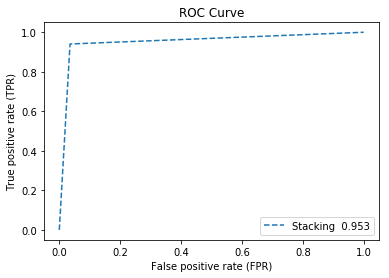

In [126]:
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_pred_s2)
plt.plot(fpr3, tpr3,label='Stacking  '+ str(round(auc(x=fpr3, y=tpr3),3)),linestyle='--')
plt.legend(loc='lower right')  
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title("ROC Curve")
plt.show()